# CREDIT CARD USAGE SEGMENTATION -Project by Adnan Ilahi

## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Machine Learning and Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


## Creating Classification Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## To avoid Warnings


In [4]:
import warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [36]:
data = pd.read_csv(r'C:\Users\acer\credit_card_data.xlsx.csv')


## Checking First Few Rows

In [37]:
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Dropping Customer ID if exists

In [38]:
if 'CUST_ID' in data.columns:
    data = data.drop('CUST_ID', axis=1)


In [39]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


## Handling Misiing Data Values

In [45]:
data = data.fillna(data.mean())

In [40]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


## Scaling Data

In [46]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## Dimensionality Reduction (PCA for Visualization)

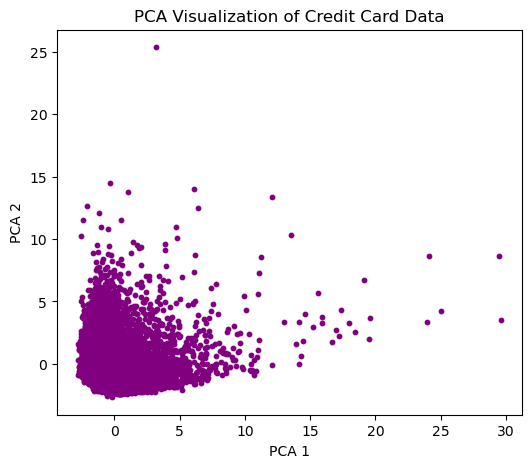

In [47]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], s=10, color='purple')
plt.title("PCA Visualization of Credit Card Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


## Using KMeans Clustering

### Finding optimal K using Elbow Method

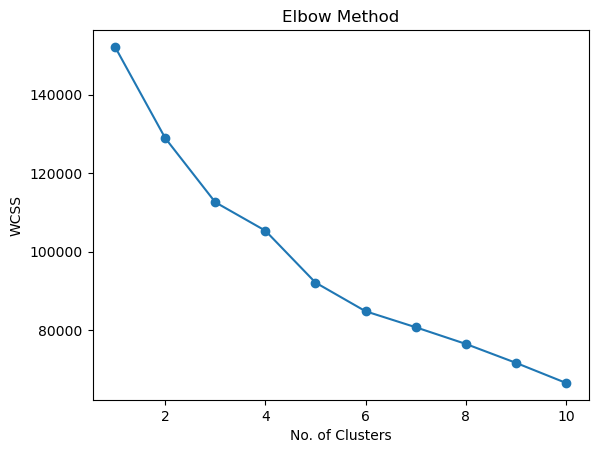

## Applying KMeans with optimal K (e.g., 4)

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

## Doing Cluster Analysis

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5023.958508           0.967107   721.184928        453.485000   
1         109.464707           0.412883   351.589913        191.487250   
2        1253.422099           0.974766  2181.418772       1241.370362   
3        1500.348531           0.966640   282.216074        209.226223   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    267.804742   5075.737329             0.329511   
1                    160.571811    299.684391             0.320703   
2                    940.311888    234.489319             0.928436   
3                     73.305481    789.088912             0.206247   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

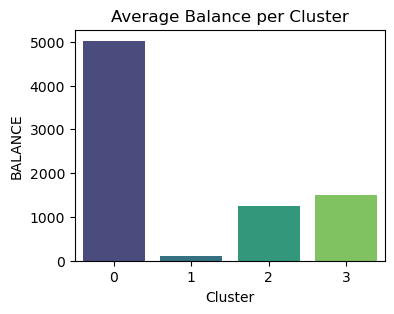

In [31]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

plt.figure(figsize=(4,3))
sns.barplot(x=cluster_summary.index, y=cluster_summary['BALANCE'], palette='viridis')
plt.title("Average Balance per Cluster")
plt.show()


## Hierarchial Clustering (Agglomerative)

In [27]:
agg = AgglomerativeClustering(n_clusters=4)
data['Agglomerative_Cluster'] = agg.fit_predict(data_scaled)


## Performance Evaluation

In [16]:
sil_score = silhouette_score(data_scaled, data['Cluster'])
print("Silhouette Score for KMeans:", sil_score)

Silhouette Score for KMeans: 0.16639208656701637


## 

## Machine Learning Model (Supervised)

### Now that clustering is done, let’s train a model to predict cluster membership for new customers

In [17]:
X = data.drop(['Cluster', 'Agglomerative_Cluster'], axis=1)
y = data['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.9558659217877095

Confusion Matrix:
 [[162   0   8  15]
 [  0 272   5   7]
 [  4   5 610   9]
 [  5   4  17 667]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       185
           1       0.97      0.96      0.96       284
           2       0.95      0.97      0.96       628
           3       0.96      0.96      0.96       693

    accuracy                           0.96      1790
   macro avg       0.96      0.94      0.95      1790
weighted avg       0.96      0.96      0.96      1790



## To Save Clustered Dataset

In [18]:
data.to_csv(r'C:\Users\acer\credit_card_data_clusters.csv', index=False)
print("File saved successfully.")


File saved successfully.


## Creating PCA 2D Cluster Visualisation

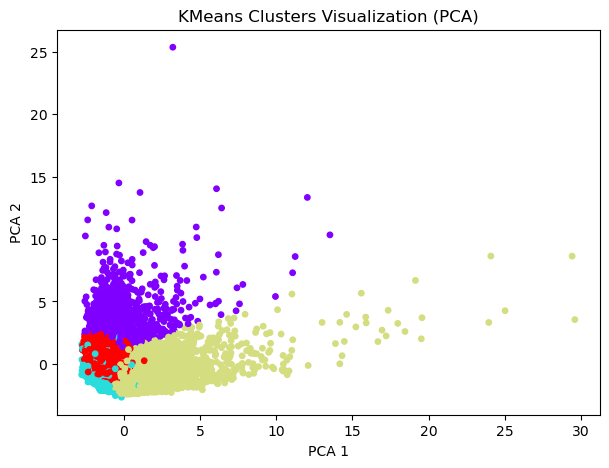

In [19]:
pca_2 = PCA(n_components=2)
pca_comp = pca_2.fit_transform(data_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_comp[:,0], pca_comp[:,1], c=data['Cluster'], cmap='rainbow', s=15)
plt.title('KMeans Clusters Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


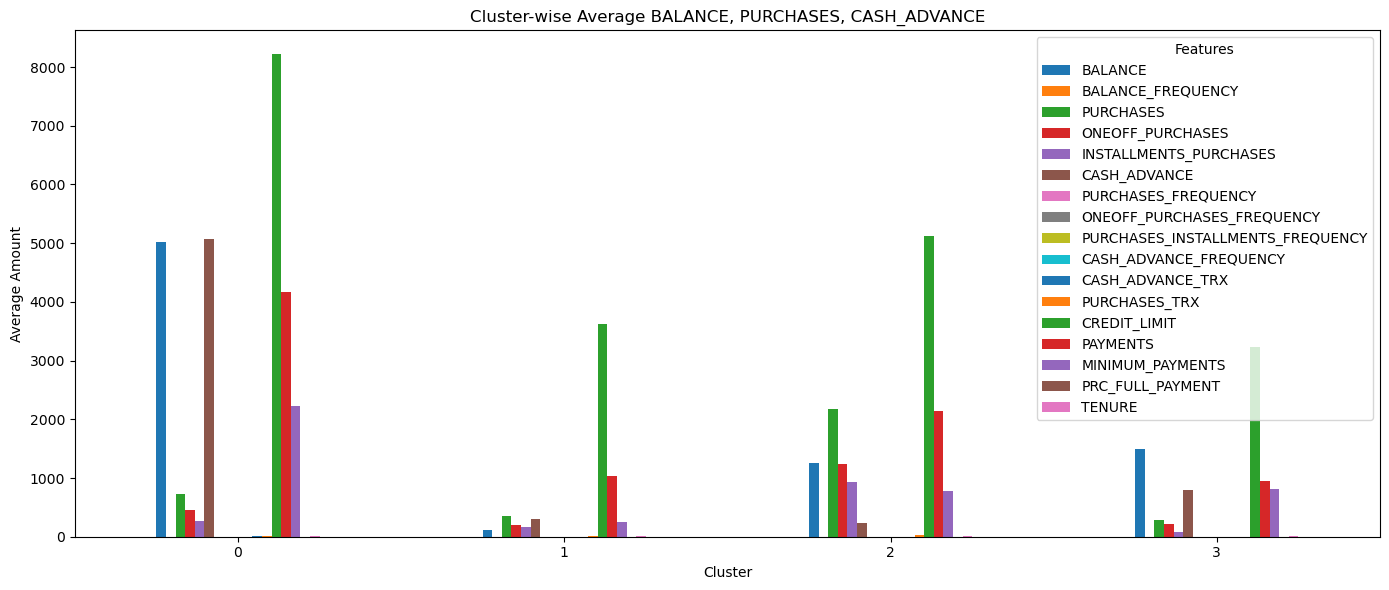

In [20]:
cluster_summary.plot(kind='bar', figsize=(14,6))
plt.title('Cluster-wise Average BALANCE, PURCHASES, CASH_ADVANCE')
plt.ylabel('Average Amount')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.show()

## Creating CO Relation Heatmap

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


## compute co relation matrix 

In [23]:
corr = data.corr()

## setting fig size

In [24]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## create Heatmap

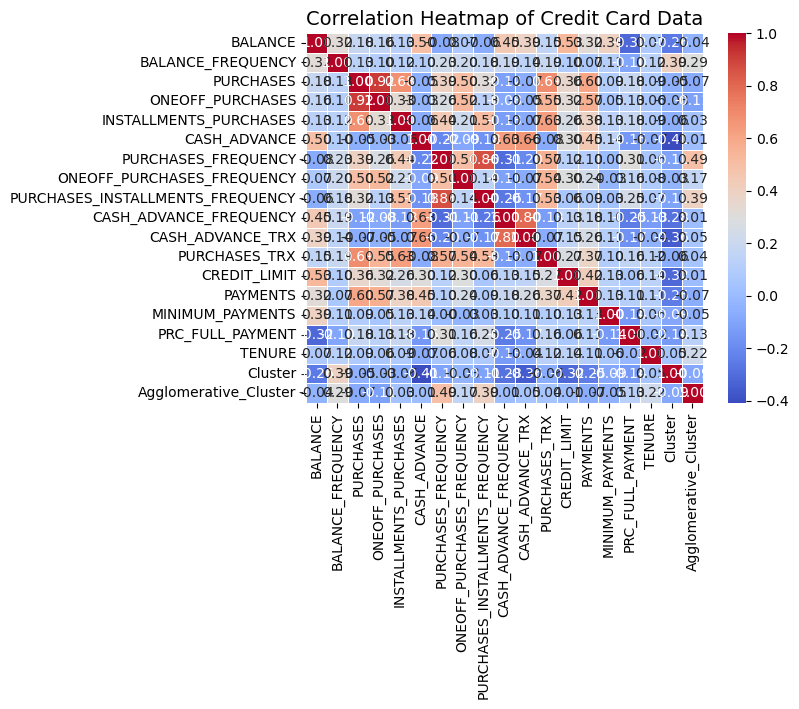

In [25]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Credit Card Data", fontsize=14)
plt.show()